# Project Overview

### Project Details
- Data wrangling, which consists of:
     * [Gathering Data](#Gathering-Data):
         1. From 'twitter-archive-enhanced.csv' file.
         2. From a link.
         3. From twitter API.
     * [Assessing data](#Assessing-Data)
     * [Cleaning data](#Cleaning-Data)
     * [storing](#Combining-Datasets), analyzing, and [visualizing](#Visualization) your wrangled data
     * Reporting on:
         1. data wrangling efforts.
         2. your data analyses and visualizations


# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
import requests 
import tweepy 
import re
import io
import os 
import json 
import time 
import warnings 
import matplotlib.pyplot as plt

# Gathering Data

### Twitter Archive

In [2]:
# reading csv as Pandas DataFrame
twitter_arch= pd.read_csv('twitter-archive-enhanced.csv')

### Image Predictions

In [3]:
# downloading URL programatically 
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions.tsv', mode='wb') as file: 
    file.write(response.content)
#reading the content of the responce from tsv file we created
image_prediction = pd.read_csv('image-predictions.tsv', sep ='\t')

### Reading json file

In [4]:
'''import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = '' 

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

test=[]


tweet_ids= list(twitter_arc.tweet_id)
# Save each tweet's returned JSON as a new line in a .txt file
with open('/home/reshu/Desktop/P7/tweet-json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            x={'tweet_id':tweet.id,'retweet_count':tweet.retweet_count,
                                            'favorite_count':tweet.favorite_count}

            test.append(x)
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail", e)
            pass   '''

'import tweepy\nfrom tweepy import OAuthHandler\nimport json\nfrom timeit import default_timer as timer\n\n# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\n# These are hidden to comply with Twitter\'s API terms and conditions\nconsumer_key = \'\'\nconsumer_secret = \'\'\naccess_token = \'\'\naccess_secret = \'\' \n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)\n\ntest=[]\n\n\ntweet_ids= list(twitter_arc.tweet_id)\n# Save each tweet\'s returned JSON as a new line in a .txt file\nwith open(\'/home/reshu/Desktop/P7/tweet-json.txt\', \'w\') as outfile:\n    # This loop will likely take 20-30 minutes to run because of Twitter\'s rate limit\n    for tweet_id in tweet_ids:\n        try:\n            tweet = api.get_status(tweet_id, tweet_mode=\'extended\')\n            x={\'tweet_id\':tweet.id,\'retweet_count\':twee

In [5]:
tweets_data = []
with open ('tweet-json.txt') as file: 
    for line in file: 
        try: 
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue
df_api = pd.DataFrame(tweets_data, columns= list(tweets_data[0].keys()))

In [6]:
# we will take the necessary columns only
df_json = df_api[['id', 'retweet_count', 'favorite_count']]
df_json.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# Assessing Data

 We are searching here for 2 issues: 
- data quality
- lack of tidiness

## | First: Twitter Archive  |

###### exploring data

In [7]:
twitter_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [8]:
twitter_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
twitter_arch.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [10]:
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
twitter_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
# now we check for number of duplicates in twitter_arch
sum(twitter_arch.duplicated())

0

In [13]:
#we check all the sources (i.e. android, iPhone, web client, etc..)
twitter_arch['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [14]:
twitter_arch['rating_denominator'].value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [15]:
twitter_arch['rating_numerator'].value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

### OBSERVATIONS

#### Quality
- ID fields should be integer not objects.
- some of the column names are not  meaningful (like: reply to the original tweet, .. ).
- timestamp column is str instead of datetime.
- rating_numerators should be of type float and are not always correctly extracted.
- Retweets and Favorite Counnts should be integers.
- Dog names sholud not be faulty names (they all lowercase).


#### Tidyness (structure)
- some columns has several information in them like: more than one stage is filled for a particular dog, and there are multiple name for the same stage, so dog stages needs to be implemented.
- Master dataset should be created and combines data from all different sources in it.

## | Second: Image Predictions |

### exploring data

In [16]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [17]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [18]:
image_prediction.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [19]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
image_prediction.shape

(2075, 12)

In [21]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
sum(image_prediction.jpg_url.duplicated()==True)

66

### OBSERVATIONS

#### Quality
- there are 2075 tweet id, and the archive dataset has a total of 2356 ids which means 281 IDs are missing.
- columns name are not the best thing.
- p1, p2, and p3 contain underscores instead of spaces in the labels.
- img_num is not needed.

## | Third: JSON File |

### exploring data

In [23]:
df_json

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [24]:
df_json.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [25]:
df_json.tail()

,id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [26]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [27]:
df_json.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [28]:
df_json['id'].isnull().sum()

0

### OBSERVATIONS

#### Quality
- the original twitter_arch has  2356 tweet_id and JSON file 2354 ( number of missing IDs = 2356-2354 = 2)

# Cleaning Data

In [29]:
# making a copy of each file to be cleaned in
twitter_arch_copy = twitter_arch.copy()
image_prediction_copy = image_prediction.copy()
df_json_copy = df_json.copy()

## | First: Twitter Archive  |

###  Define
Replace all unsuitable names to None

### Code 

In [30]:
unsuitable = twitter_arch_copy[twitter_arch_copy.name.str.islower()==True]['name'].index

In [31]:
twitter_arch_copy.drop(unsuitable, inplace=True)

###  Test

In [32]:
twitter_arch_copy.shape

(2247, 17)

###  Define
set all rating_denominator values to 10 

###  Code 

In [33]:
twitter_arch_copy.rating_denominator= twitter_arch_copy['rating_denominator']=10.0

### Test

In [34]:
twitter_arch_copy.rating_denominator.unique()

array([10.])

In [35]:
twitter_arch_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2247 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2247 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2247 non-null   object 
 4   source                      2247 non-null   object 
 5   text                        2247 non-null   object 
 6   retweeted_status_id         176 non-null    float64
 7   retweeted_status_user_id    176 non-null    float64
 8   retweeted_status_timestamp  176 non-null    object 
 9   expanded_urls               2188 non-null   object 
 10  rating_numerator            2247 non-null   int64  
 11  rating_denominator          2247 non-null   float64
 12  name                        2247 non-null   object 
 13  doggo                       2247 

###  Define
Change type of rating_numerator to float and correctly extract it 

###  Code 

In [36]:
#extracting it from tweets
new_rating_numerator = twitter_arch_copy[twitter_arch_copy.text.str.contains(r"(\d+\.\d*\/\d+)")]['text'].str.extract(r"(\d+\.\d*(?=\/\d+))")
new_rating_numerator

C:\Users\Noura\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,0
45,13.5
340,9.75
695,9.75
763,11.27
1689,9.5
1712,11.26


In [37]:
twitter_arch_copy.loc[new_rating_numerator.index]['rating_numerator']

45       5
340     75
695     75
763     27
1689     5
1712    26
Name: rating_numerator, dtype: int64

In [38]:
#fexing whatss wrong
twitter_arch_copy.loc[new_rating_numerator.index, 'rating_numerator'] = new_rating_numerator.values

In [39]:
#changing its type to float
twitter_arch_copy.rating_numerator= twitter_arch_copy.rating_numerator.astype(float)


### Test

In [40]:
twitter_arch_copy.loc[new_rating_numerator.index]['rating_numerator']

45      13.50
340      9.75
695      9.75
763     11.27
1689     9.50
1712    11.26
Name: rating_numerator, dtype: float64

###  Define
Convert timestamp columns to date

###  Code 

In [41]:
twitter_arch_copy['timestamp']= pd.to_datetime(twitter_arch_copy['timestamp'])
twitter_arch_copy['retweeted_status_timestamp']= pd.to_datetime(twitter_arch_copy['retweeted_status_timestamp'])

### Test

In [42]:
twitter_arch_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2247 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2247 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2247 non-null   datetime64[ns, UTC]
 4   source                      2247 non-null   object             
 5   text                        2247 non-null   object             
 6   retweeted_status_id         176 non-null    float64            
 7   retweeted_status_user_id    176 non-null    float64            
 8   retweeted_status_timestamp  176 non-null    datetime64[ns, UTC]
 9   expanded_urls               2188 non-null   object             
 10  rating_numerator            2247 non-null   float64         

### Define

Create the "dog_stage" column by combining columns "doggo", "floofer", "pupper" and "puppo" 


### Code

In [43]:
# handle none
twitter_arch_copy.doggo.replace('None', '', inplace=True)
twitter_arch_copy.floofer.replace('None', '', inplace=True)
twitter_arch_copy.pupper.replace('None', '', inplace=True)
twitter_arch_copy.replace('None', '', inplace=True)

# merge into column
twitter_arch_copy['dog_stage'] = twitter_arch_copy.doggo + twitter_arch_copy.floofer + twitter_arch_copy.pupper + twitter_arch_copy.puppo

#handling multiple values
multiple_val = ['doggopupper','doggofloofer','doggopuppo']
twitter_arch_copy.dog_stage.replace(multiple_val, 'multiple', inplace=True)

#handle missing values
twitter_arch_copy.loc[twitter_arch_copy.dog_stage == '', 'dog_stage'] = np.nan

# droppint pupper, doggo, puppo, floofer colmns
twitter_arch_copy.drop(['pupper', 'doggo', 'puppo', 'floofer'], inplace= True, axis = 1)

In [44]:
multiple_val = ['doggopupper','doggofloofer','doggopuppo']
twitter_arch_copy.dog_stage.replace(multiple_val, 'multiple', inplace=True)
twitter_arch_copy.loc[twitter_arch_copy.dog_stage == '', 'dog_stage'] = np.nan
print(twitter_arch_copy.dog_stage.value_counts())

pupper      233
doggo        81
puppo        29
multiple     12
floofer       9
Name: dog_stage, dtype: int64


### Test

In [45]:
twitter_arch_copy.dog_stage.value_counts()

pupper      233
doggo        81
puppo        29
multiple     12
floofer       9
Name: dog_stage, dtype: int64

In [46]:
twitter_arch_copy.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1357,703407252292673536,NaN,NaN,2016-02-27 02:32:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This pupper doesn't understand gates. 10/10 so...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/703407252...,10.0,10.0,,pupper
2285,667188689915760640,NaN,NaN,2015-11-19 03:52:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Quite an advanced dog here. Impressively dress...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/667188689...,10.0,10.0,,NaN
1742,679462823135686656,NaN,NaN,2015-12-23 00:45:35+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Hurley. He's the curly one. He hugs every...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/679462823...,11.0,10.0,Hurley,NaN
1809,676864501615042560,NaN,NaN,2015-12-15 20:40:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Ash. He's just a head now. Lost his body ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/676864501...,10.0,10.0,Ash,NaN
1546,689283819090870273,NaN,NaN,2016-01-19 03:10:43+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Chipson. He's aerodynamic af. No ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/689283819...,9.0,10.0,Chipson,NaN
799,772826264096874500,NaN,NaN,2016-09-05 15:58:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Roosevelt. He's preparing for takeoff. Ma...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/772826264...,11.0,10.0,Roosevelt,NaN
365,829011960981237760,NaN,NaN,2017-02-07 17:00:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Dexter. He was reunited with his mom y...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/829011960...,13.0,10.0,Dexter,NaN
1061,741303864243200000,NaN,NaN,2016-06-10 16:19:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Theodore. He just saw an adult wearing...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/741303864...,12.0,10.0,Theodore,NaN
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,NaN,NaT,NaN,9.5,10.0,,NaN
1641,684122891630342144,NaN,NaN,2016-01-04 21:23:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Heartwarming scene of two pups that want nothi...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/684122891...,11.0,10.0,,NaN


In [47]:
twitter_arch_copy.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1844,675849018447167488,6.758457e+17,4.196984e+09,2015-12-13 01:25:37+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This dog is being demoted to a 9/10 for not we...,NaN,NaN,NaT,NaN,9.0,10.0,,NaN
2014,672222792075620352,NaN,NaN,2015-12-03 01:16:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cal. He's a Swedish Geriatric Cheddar....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/672222792...,9.0,10.0,Cal,NaN
581,800443802682937345,NaN,NaN,2016-11-20 21:00:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sampson. He's about to ...,7.761133e+17,4.196984e+09,2016-09-14 17:40:06+00:00,https://twitter.com/dog_rates/status/776113305...,11.0,10.0,Sampson,pupper
1918,674271431610523648,NaN,NaN,2015-12-08 16:56:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""AT DAWN, WE RIDE""\n10/10 for both dogs https:...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/674271431...,10.0,10.0,,NaN
610,797236660651966464,NaN,NaN,2016-11-12 00:36:46+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Pancake. She loves Batman and winks li...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/797236660...,12.0,10.0,Pancake,NaN
1759,678740035362037760,NaN,NaN,2015-12-21 00:53:29+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Tango. He's a large dog. Doesn't care muc...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/678740035...,6.0,10.0,Tango,NaN
609,797545162159308800,NaN,NaN,2016-11-12 21:02:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She steals things. Guilt incre...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/797545162...,12.0,10.0,Cassie,NaN
1414,698710712454139905,NaN,NaN,2016-02-14 03:29:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cuddles. He's not entirely sure how do...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/698710712...,10.0,10.0,Cuddles,NaN
1743,679405845277462528,NaN,NaN,2015-12-22 20:59:10+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Crazy unseen footage from Jurassic Park. 10/10...,NaN,NaN,NaT,https://vine.co/v/iKVFEigMLxP,10.0,10.0,,NaN
1766,678399652199309312,NaN,NaN,2015-12-20 02:20:55+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This made my day. 12/10 please enjoy https://t...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/678399652...,12.0,10.0,,NaN


### Define
Extract tweet source from `source` column using `apply` meth in pandas and convert it to categorical.

### Code

In [48]:
# check for the unique values
twitter_arch_copy.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [49]:
#make a function fix_source which extract the strings between tags
def fix_source(x):
    'x is an html string from the source column in df_arch_cleaned dataset'
    #find the first closed  tag >
    i= x.find('>') + 1
    # find the first open tag after the previous <
    j =x[i:].find('<')
    # extract the text in between
    return x[i:][:j]

In [50]:
twitter_arch_copy.source = twitter_arch_copy.source.apply(lambda x: fix_source(x)).astype('category')

### Test

In [51]:
# check for the unique values
twitter_arch_copy.source.unique()

['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene', 'TweetDeck']
Categories (4, object): ['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene', 'TweetDeck']

### Define
text column has the link for the tweets and ratings at the end we can remove it.

### Code

In [52]:
twitter_arch_copy.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [53]:
twitter_arch_copy.text = twitter_arch_copy.text.str.extract('(.+(?=\s\d+/\d+\s))')

### Test

In [54]:
twitter_arch_copy.text.sample(10)

832     Say hello to Oakley and Charlie. They're convi...
95      RT @dog_rates: This is Walter. He won't start ...
1202    This is Bluebert. He just saw that both #Final...
2224                       I can't do better than he did.
605     RT @dog_rates: Not familiar with this breed. N...
1336                  This is Bode. He's a heavy sleeper.
1028    This is Gus. He didn't win the Powerball. Quit...
471     This is Binky. She appears to be rather h*ckin...
2113    Meet Hank and Sully. Hank is very proud of the...
749     RT @dog_rates: Meet Hurley. He's the curly one...
Name: text, dtype: object

## | Second: Image Predictions |

### Define

 Capitalize the first letter of names of p1,p2,p3 columns


### Code


In [55]:
image_prediction_copy.p1= image_prediction_copy.p1.str.capitalize()
image_prediction_copy.p2= image_prediction_copy.p2.str.capitalize()
image_prediction_copy.p3= image_prediction_copy.p3.str.capitalize()

### Test

In [56]:
image_prediction_copy.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True


In [57]:
image_prediction.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


### Define

Replace _ and - with white space in p1,p2 and p3 columns

In [58]:
image_prediction_copy.p1= image_prediction_copy.p1.str.replace('_',' ')
image_prediction_copy.p2= image_prediction_copy.p2.str.replace('_',' ')
image_prediction_copy.p3= image_prediction_copy.p3.str.replace('_',' ')

image_prediction_copy.p1= image_prediction_copy.p1.str.replace('-',' ')
image_prediction_copy.p2= image_prediction_copy.p2.str.replace('-',' ')
image_prediction_copy.p3= image_prediction_copy.p3.str.replace('-',' ')



### Code

In [59]:
image_prediction_copy.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese mountain dog,0.651137,True,English springer,0.263788,True,Greater swiss mountain dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box turtle,0.933012,False,Mud turtle,0.045885,False,Terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517,True,Tibetan mastiff,0.058279,True,Fur coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping cart,0.962465,False,Shopping basket,0.014594,False,Golden retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature poodle,0.201493,True,Komondor,0.192305,True,Soft coated wheaten terrier,0.082086,True


### Define
- Remove `img_num` column from df_pred_cleand.

### Code

In [60]:
image_prediction_copy.drop('img_num', axis=1, inplace=True)

### Test

In [61]:
image_prediction_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   p1        2075 non-null   object 
 3   p1_conf   2075 non-null   float64
 4   p1_dog    2075 non-null   bool   
 5   p2        2075 non-null   object 
 6   p2_conf   2075 non-null   float64
 7   p2_dog    2075 non-null   bool   
 8   p3        2075 non-null   object 
 9   p3_conf   2075 non-null   float64
 10  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 135.9+ KB


### Define
Create `breed` and `confidence` columns with highest confidence predictions and drop other columns

### Code

In [62]:
breed = []
confidence = []
# iterating over df_pred row by row and taking the highest confident prediction other wise np.nan
for index, row in image_prediction_copy.iterrows():
    if row['p1_dog'] and row['p1_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] and row['p2_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] and row['p3_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append(np.nan)
        confidence.append(np.nan)
        
image_prediction_copy['breed'] = breed
image_prediction_copy['confidence'] = confidence


In [63]:
image_prediction_copy= image_prediction_copy[['tweet_id', 'jpg_url', 'breed', 'confidence']]

### Test

In [64]:
image_prediction_copy.head()

,tweet_id,jpg_url,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh springer spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature pinscher,0.560311


In [65]:
image_prediction_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2075 non-null   int64  
 1   jpg_url     2075 non-null   object 
 2   breed       1532 non-null   object 
 3   confidence  1532 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 65.0+ KB


## | Third: JSON File |

### Define
set tweet_id to string with astype()

### Code

In [66]:
df_json_copy['id'] = df_json_copy['id'].astype('str')

### Test

In [67]:
df_json_copy.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Define

Setting the column in order

### Code

In [68]:
df_json_copy = df_json_copy[['id', 'favorite_count', 'retweet_count']]

### Test

In [69]:
df_json_copy.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


### Define
Renaming the column names. 
WHY? Because we have to merge two tables on ground of some key whose name must be common.

### Code

In [70]:
df_json_copy.rename(columns={ 'id': 'tweet_id', 'favorite_count': 'likes', 'retweet_count': 'retweets'}, inplace=True)

### Test

In [71]:
df_json_copy.head()

,tweet_id,likes,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [72]:
df_json_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2354 non-null   object
 1   likes     2354 non-null   int64 
 2   retweets  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [73]:
df_json_copy.describe()

,likes,retweets
count,2354.000000,2354.000000
mean,8080.968564,3164.797366
std,11814.771334,5284.770364
min,0.000000,0.000000
25%,1415.000000,624.500000
50%,3603.500000,1473.500000
75%,10122.250000,3652.000000
max,132810.000000,79515.000000


### Define
we should check the entries we are merging on are the same type


### Code

In [74]:
twitter_arch_copy['tweet_id'] = twitter_arch_copy['tweet_id'].astype('str')
image_prediction_copy['tweet_id'] = image_prediction_copy['tweet_id'].astype('str')
df_json_copy['tweet_id'] = df_json_copy['tweet_id'].astype('str')


### Test

In [75]:
type(twitter_arch_copy['tweet_id'].iloc[0])
type(image_prediction_copy['tweet_id'].iloc[0])
type(df_json_copy['tweet_id'].iloc[0])

str

# Combining Datasets

### Define
Combine df_json_copy and image_prediction_copy to twitter_arch_copy using merge() 


### Code

In [76]:
df_master = pd.merge(twitter_arch_copy, image_prediction_copy, on=['tweet_id'], how='inner')
df_master = pd.merge(df_master, df_json_copy, on = 'tweet_id', how = 'inner' )


In [77]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1973 entries, 0 to 1972
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1973 non-null   object             
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   1973 non-null   datetime64[ns, UTC]
 4   source                      1973 non-null   category           
 5   text                        1903 non-null   object             
 6   retweeted_status_id         77 non-null     float64            
 7   retweeted_status_user_id    77 non-null     float64            
 8   retweeted_status_timestamp  77 non-null     datetime64[ns, UTC]
 9   expanded_urls               1973 non-null   object             
 10  rating_numerator            1973 non-null   float64         

In [78]:
df_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,breed,confidence,likes,retweets
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,NaN,39467,8853
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,33819,6514
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,25461,4328
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal.,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,NaN,NaN,42908,8964
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712,41048,9774


In [79]:
# Calulate the value of 'rating'
df_master['rating'] = df_master['rating_numerator'] / df_master['rating_denominator']



In [80]:
# Check for presence of new column and correct calculation
df_master.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,breed,confidence,likes,retweets,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,NaN,39467,8853,1.3


In [81]:
# Renaming some column names
df_master.rename(columns={'rating_numerator': 'numerator', 
                        'rating_denominator': 'denominator'}, inplace=True)


# Drop undesired columns to make dataframe easier to view
df_master.drop(['retweeted_status_id','retweeted_status_timestamp', 'retweeted_status_user_id' ], axis=1, inplace=True)
df_master.drop(["in_reply_to_status_id", "in_reply_to_user_id"], axis=1, inplace=True)

# Allow all columns and text to be shown 
pd.set_option('display.max_columns', None)

In [82]:
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,numerator,denominator,name,dog_stage,jpg_url,breed,confidence,likes,retweets,rating
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,NaN,39467,8853,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,33819,6514,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,25461,4328,1.2
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal.,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,NaN,NaN,42908,8964,1.3
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712,41048,9774,1.2


#### Storing to csv

In [83]:
df_master.to_csv('twitter_archive_master.csv', encoding='utf-8',index=False)

In [84]:
wrangled_df= pd.read_csv('twitter_archive_master.csv')

# changing some columns types
wrangled_df['timestamp']= pd.to_datetime(wrangled_df['timestamp'])
wrangled_df.source = wrangled_df.source.astype('category')
wrangled_df.dog_stage = wrangled_df.dog_stage.astype('category')
wrangled_df.breed = wrangled_df.breed.astype('category')
wrangled_df.text = wrangled_df.text.astype('str')
# we don't need tweet_id to be integer
wrangled_df.tweet_id = wrangled_df.tweet_id.astype('object')


In [85]:
wrangled_df['breed'].isnull().sum()


513

In [86]:
wrangled_df.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,numerator,denominator,name,dog_stage,jpg_url,breed,confidence,likes,retweets,rating
346,819711362133872643,2017-01-13 01:03:12+00:00,Twitter for iPhone,This is Howie. He just bloomed.,https://twitter.com/dog_rates/status/819711362...,11.0,10.0,Howie,NaN,https://pbs.twimg.com/media/C2AzHjQWQAApuhf.jpg,NaN,NaN,14916,3604,1.1
1854,668623201287675904,2015-11-23 02:52:48+00:00,Twitter for iPhone,This is Jomathan. He is not thrilled about the...,https://twitter.com/dog_rates/status/668623201...,10.0,10.0,Jomathan,NaN,https://pbs.twimg.com/media/CUdtP1xUYAIeBnE.jpg,Chihuahua,0.708163,1551,851,1.0
526,790987426131050500,2016-10-25 18:44:32+00:00,Twitter for iPhone,This is Misty. She has a cowboy hat on her nose.,https://twitter.com/dog_rates/status/790987426...,12.0,10.0,Misty,NaN,https://pbs.twimg.com/media/Cvom3ZJXEAE29TD.jpg,Cocker spaniel,0.349195,11089,2483,1.2
64,877736472329191424,2017-06-22 03:54:17+00:00,Twitter for iPhone,This is Aja. She was just told she's a good do...,https://twitter.com/dog_rates/status/877736472...,13.0,10.0,Aja,NaN,https://pbs.twimg.com/media/DC5YqoQW0AArOLH.jpg,Chesapeake bay retriever,0.837956,71144,17300,1.3
1014,710997087345876993,2016-03-19 01:11:29+00:00,Twitter for iPhone,Meet Milo and Amos. They are the best of pals....,https://twitter.com/dog_rates/status/710997087...,12.0,10.0,Milo,NaN,https://pbs.twimg.com/media/Cd34FClUMAAnvGP.jpg,Malamute,0.281260,4960,1561,1.2
1705,671511350426865664,2015-12-01 02:09:16+00:00,Twitter for iPhone,Say hello to Hammond. He's just a wee lil pup....,https://twitter.com/dog_rates/status/671511350...,8.0,10.0,Hammond,NaN,https://pbs.twimg.com/media/CVGwAh-W4AAIHJz.jpg,NaN,NaN,1734,791,0.8
1406,680497766108381184,2015-12-25 21:18:05+00:00,Twitter for iPhone,Meet Percy. He's a Latvian Yuletide Heineken. ...,https://twitter.com/dog_rates/status/680497766...,12.0,10.0,Percy,NaN,https://pbs.twimg.com/media/CXGdG0aWcAEbOO1.jpg,Chihuahua,0.538354,4639,2162,1.2
961,718460005985447936,2016-04-08 15:26:28+00:00,Twitter for iPhone,Meet Bowie. He's listening for underground squ...,https://twitter.com/dog_rates/status/718460005...,9.0,10.0,Bowie,NaN,https://pbs.twimg.com/media/Cfh7j6CWQAAndTd.jpg,NaN,NaN,2846,602,0.9
940,722613351520608256,2016-04-20 02:30:23+00:00,Twitter for iPhone,Meet Schnitzel. He's a Tropicana Floofboop. Ge...,https://twitter.com/dog_rates/status/722613351...,12.0,10.0,Schnitzel,NaN,https://pbs.twimg.com/media/Cgc9AjMVIAERdUA.jpg,Labrador retriever,0.530915,5393,1831,1.2
1273,688547210804498433,2016-01-17 02:23:42+00:00,Twitter for iPhone,This is Frönq. He got caught stealing a waffle...,https://twitter.com/dog_rates/status/688547210...,9.0,10.0,Frönq,NaN,https://pbs.twimg.com/media/CY42CFWW8AACOwt.jpg,Papillon,0.531279,2862,789,0.9


In [87]:
wrangled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973 entries, 0 to 1972
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       1973 non-null   object             
 1   timestamp      1973 non-null   datetime64[ns, UTC]
 2   source         1973 non-null   category           
 3   text           1973 non-null   object             
 4   expanded_urls  1973 non-null   object             
 5   numerator      1973 non-null   float64            
 6   denominator    1973 non-null   float64            
 7   name           1396 non-null   object             
 8   dog_stage      307 non-null    category           
 9   jpg_url        1973 non-null   object             
 10  breed          1460 non-null   category           
 11  confidence     1460 non-null   float64            
 12  likes          1973 non-null   int64              
 13  retweets       1973 non-null   int64            

# Visualization

<h3 style='color: red'>Now we have our cleaned data to play with and visulaize our analysis</h3>

<h2 style='color: blue'>First we see here the rating frequency in two different plots:</h2>

   1. **bar plot.** 
       - in this bar plot we can see that 12.0 is the highst rating frequency with 459 unique vlaues.
       
       
   2. **box plot - to see the outliers.**
       - we can see that the most extreme outliers are when numerator is above 400

In [88]:
wrangled_df.numerator.value_counts().head(1)

12.0    459
Name: numerator, dtype: int64

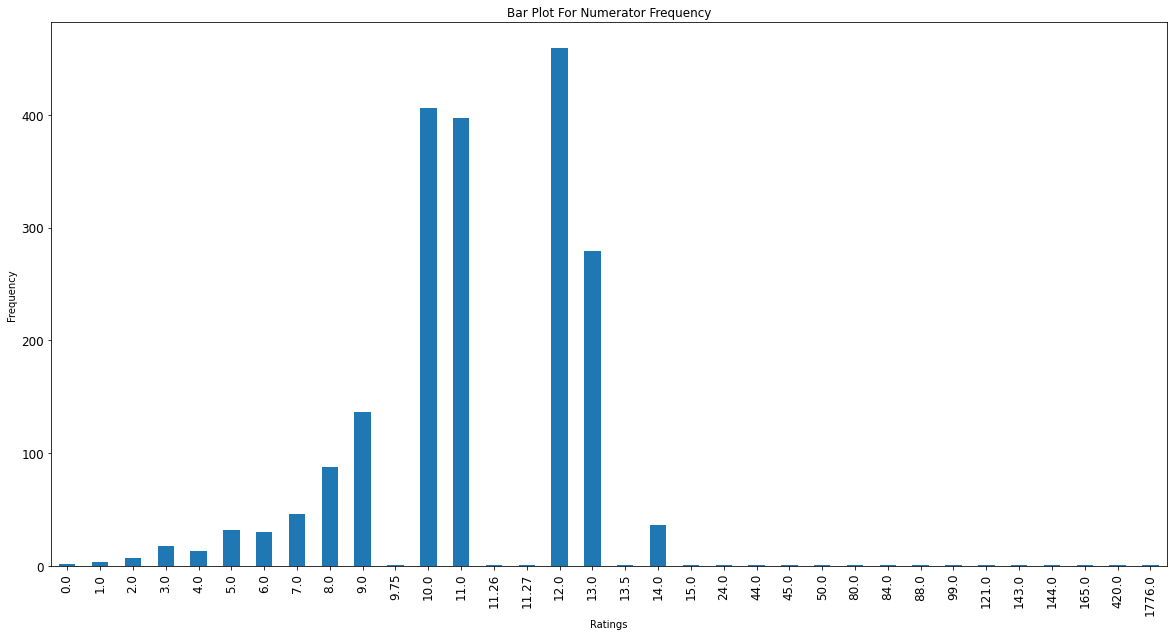

In [89]:
wrangled_df.numerator.value_counts().sort_index().plot(title='Bar Plot For Numerator Frequency',ylabel= 'Frequency', xlabel='Ratings',kind ='bar', figsize=(20,10), fontsize= 'large');

In [90]:
outliers_df = wrangled_df[df_master.numerator > 400][['numerator', 'name', 'jpg_url', 'text']]
outliers_df

,numerator,name,jpg_url,text
789,1776.0,Atticus,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,This is Atticus. He's quite simply America af.
1730,420.0,NaN,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,Good dogg.


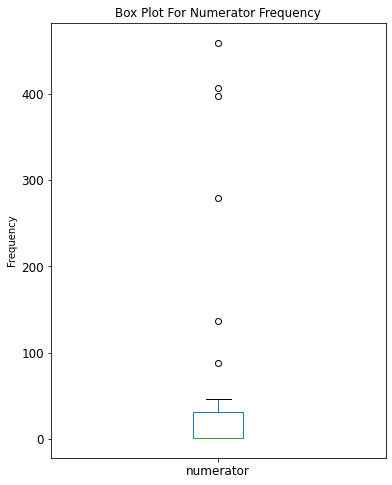

In [91]:
wrangled_df.numerator.value_counts().sort_index().plot(title='Box Plot For Numerator Frequency',layout=(3,5), figsize= (6,8), ylabel= 'Frequency', xlabel='Ratings',fontsize= 'large', kind ='box');

- **we can see here that people give a very high rate to this very cute dog, and the other picture is Snoop Dogg the rap star and should be removed from our data**

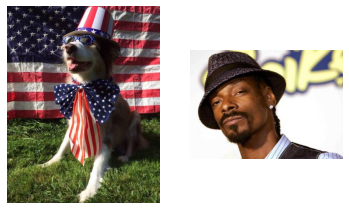

In [92]:
import PIL
from PIL import Image
from io import BytesIO
if not os.path.exists('images'):
    os.makedirs('images')
fig=plt.figure()
c = 1
for index, row in outliers_df.iterrows():
    r = requests.get(row['jpg_url'])
    i = Image.open(BytesIO(r.content))
    i.save('images/' +  str(index) + '_' + str(row['numerator']) + "_" + str(row['name']) + '.jpg')
    fig.add_subplot(1, 2, c)
    c += 1
    plt.imshow(i)
    plt.axis("off")
plt.show()

In [93]:
#Remove 'Snoop Dogg' from our master data
df_master.drop(index=1552, inplace=True)

<h3 style='color: blue'>Now we explore the most puplar dog stage</h3>

     - we can see that pupper is the most popular dog stage

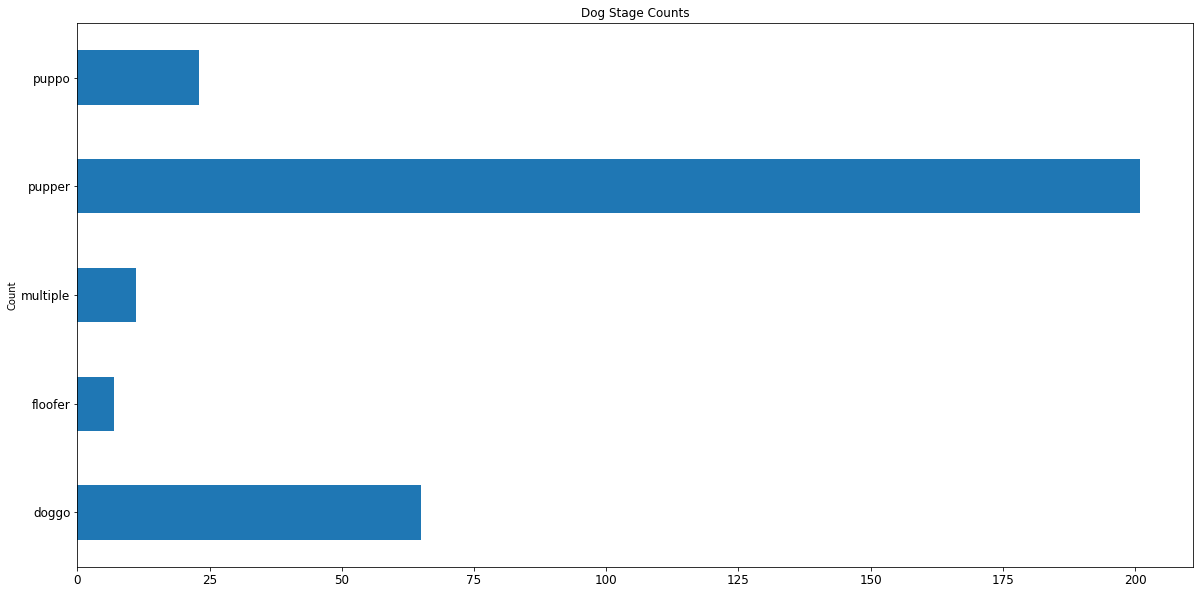

In [94]:
wrangled_df.groupby('dog_stage').count()['tweet_id'].plot(kind ='barh', xlabel='Count', ylabel='Dog stage',fontsize='large', title='Dog Stage Counts', figsize=(20,10));

<h3 style='color: blue'>Now we explore the most puplar dog breed</h3>

     - we can see that Golden Retriever is the most popular dog breed

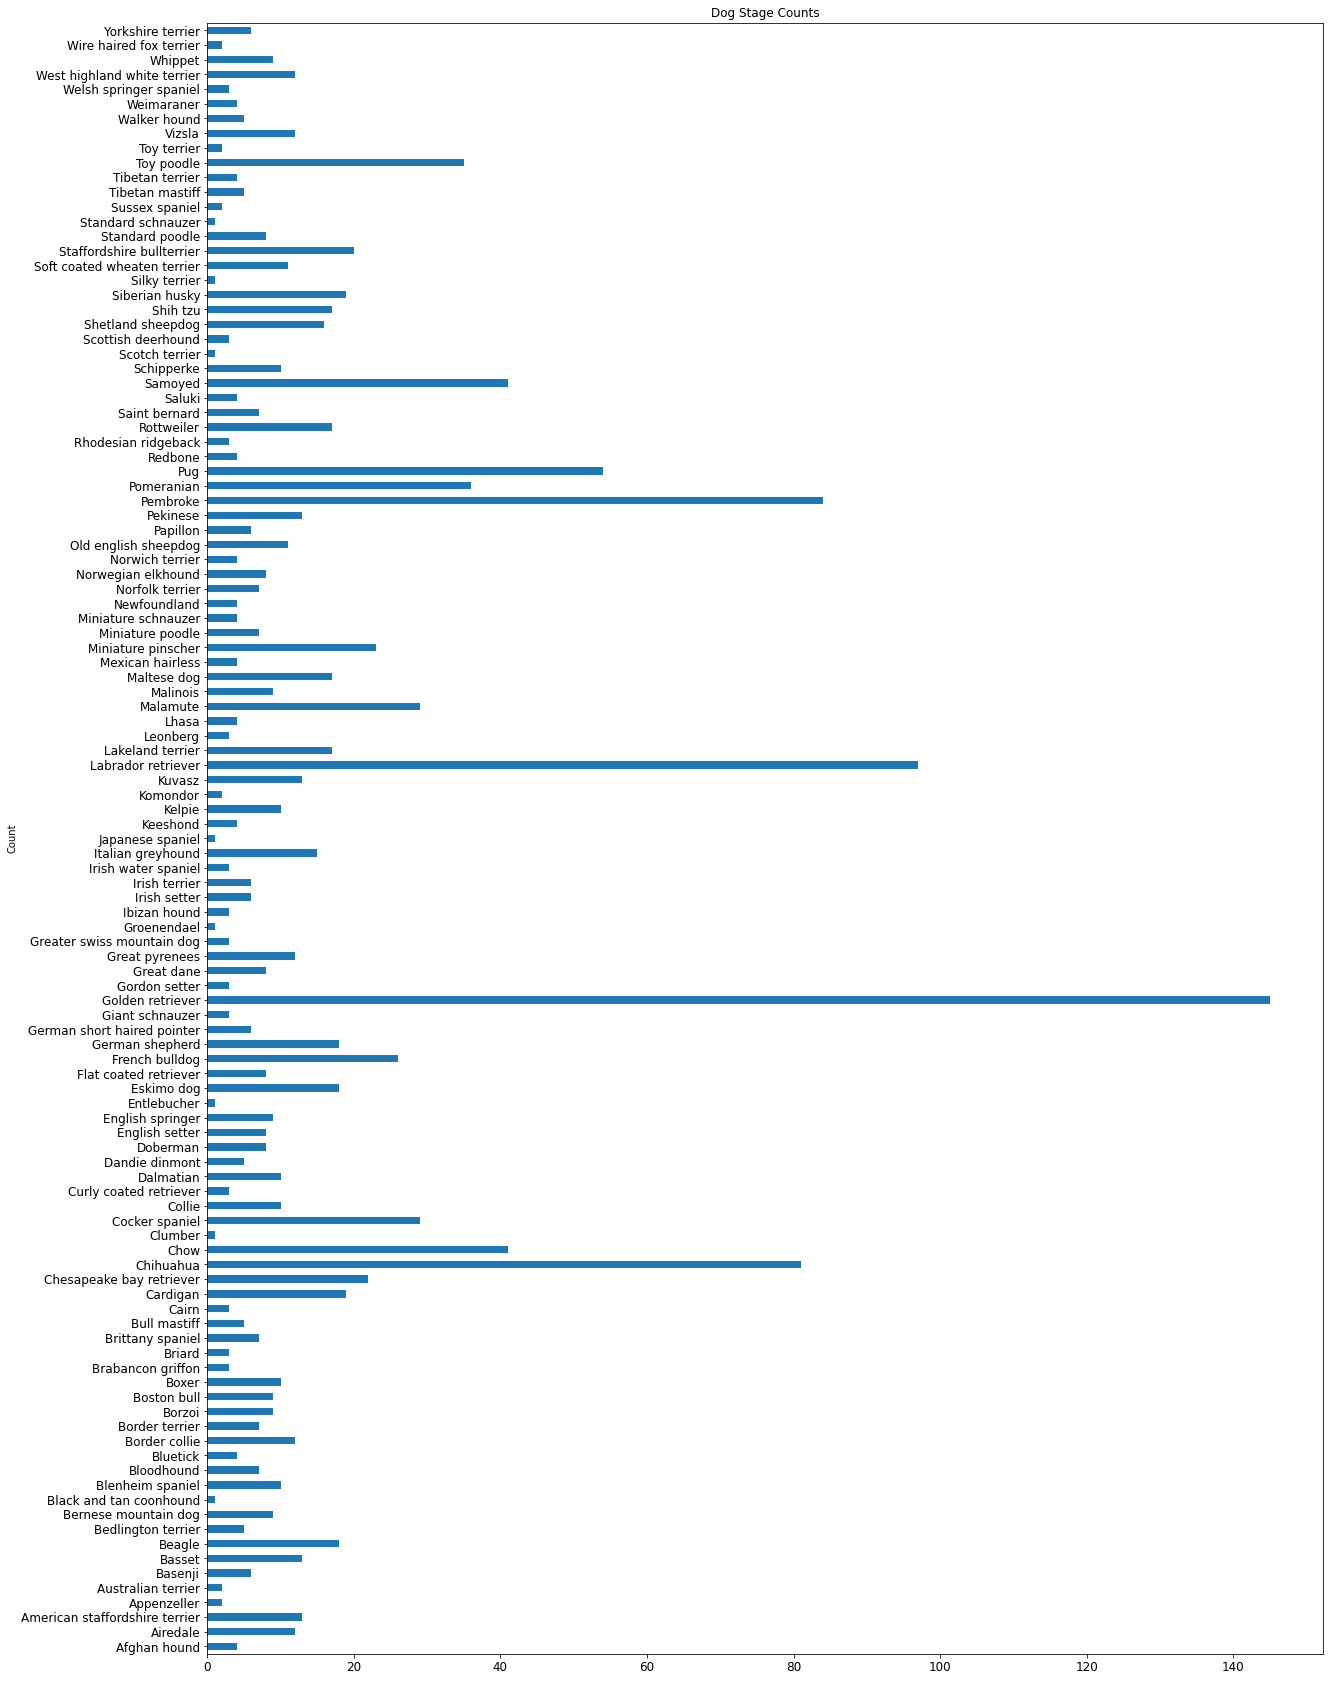

In [95]:
wrangled_df.groupby('breed').count()['tweet_id'].plot(kind ='barh', xlabel='Count', ylabel='Dog stage',fontsize='large', title='Dog Stage Counts', figsize=(20,30));

   **I MEAN LOOK HOW CUTE THEY ARE!!!**

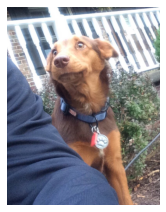

In [96]:
if not os.path.exists('images'):
    os.makedirs('images')
fig=plt.figure()
c = 1
df = wrangled_df[wrangled_df['dog_stage']=='pupper'].sample(1)
for index, row in df.iterrows():
    r = requests.get(row['jpg_url'])
    i = Image.open(BytesIO(r.content))
    i.save('images/' +  str(index) + '_' + str(row['numerator']) + "_" + str(row['name']) + '.jpg')
    fig.add_subplot(1, 2, c)
    c += 1
    plt.imshow(i)
    plt.axis("off")
plt.show()

<h3 style='color: blue'>Comparing different tweet sources</h3>

- now we see the frequency of the different sources people tweeting from, we can see that iPhone users are dominant.

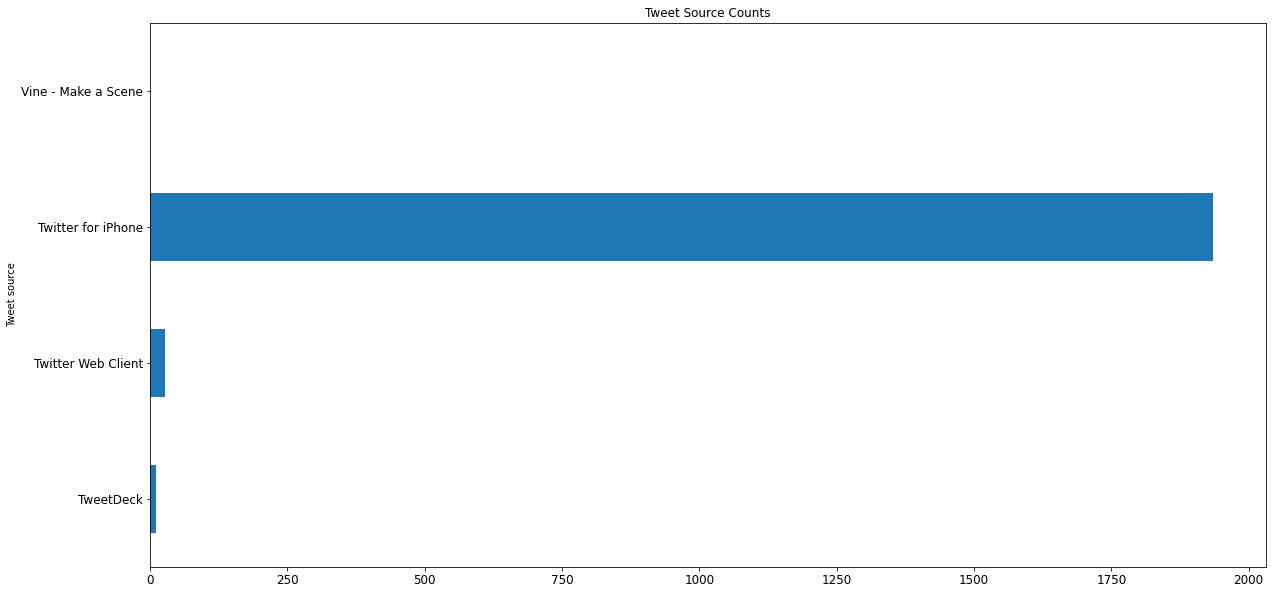

In [97]:
df_master.groupby('source').count()['tweet_id'].plot(kind = 'barh', ylabel='# of users', xlabel='Tweet source',fontsize='large', title='Tweet Source Counts',figsize=(20,10));

<h3 style='color: blue'>Most popular dogs names</h3>

- now we explore the most popular 10 names, the most popular name is Charlie, over 10 dogs named Charlie.

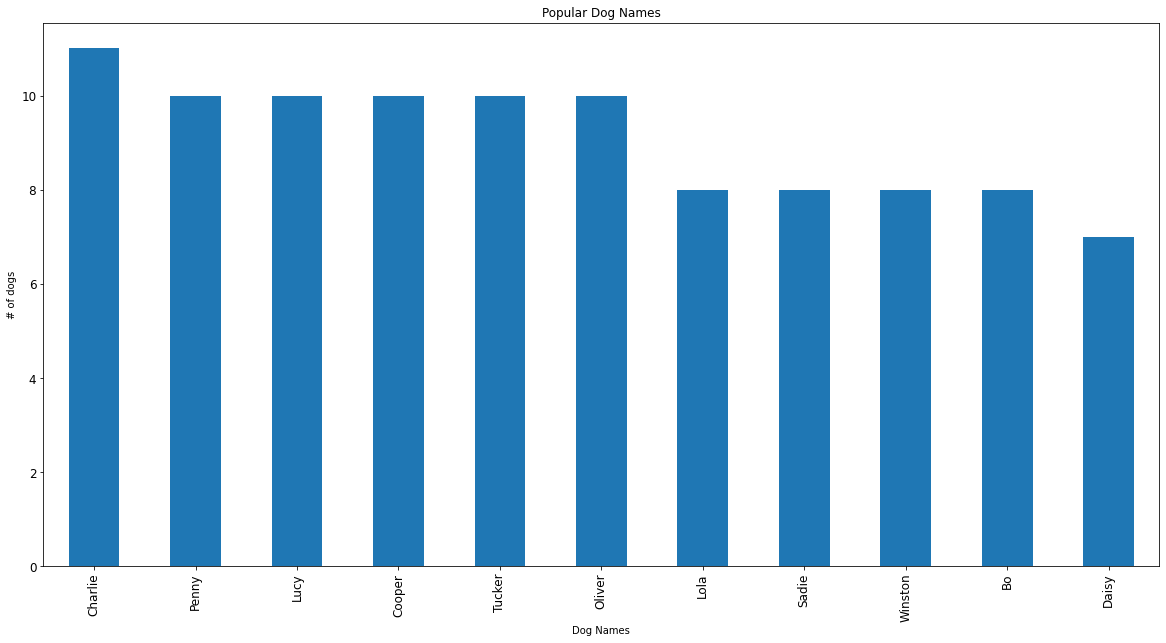

In [98]:
wrangled_df['name'].value_counts()[0:11].plot(title='Popular Dog Names',xlabel='Dog Names', ylabel='# of dogs',kind = 'bar',fontsize='large',figsize=(20,10));

<h3 style='color: blue'>Now we see the relation between # of retweets and dog stage</h3>

       - we can see that doggo stage dogs are getting the most retweets and likes

In [99]:
wrangled_df.groupby('dog_stage')['likes'].sum()

dog_stage
doggo       1196581
floofer       92442
multiple     167469
pupper      1384963
puppo        474806
Name: likes, dtype: int64

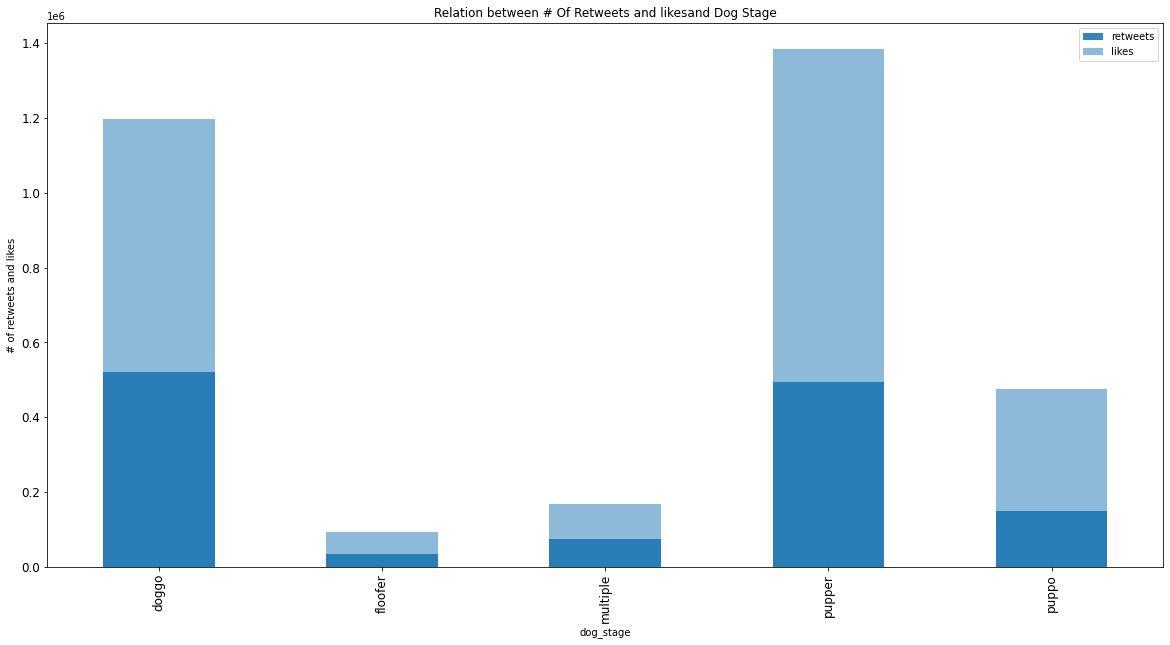

In [100]:
wrangled_df.groupby('dog_stage')['retweets'].sum().plot(legend= True,title='Relation between # Of Retweets and likesand Dog Stage',alpha=0.9,fontsize='large',kind='bar',ylabel='# of retweets and likes', figsize=(20,10));
wrangled_df.groupby('dog_stage')['likes'].sum().plot(legend= True, alpha=0.5, kind='bar', figsize=(20,10));


<h3 style='color: blue'>Now we see the relation between # of retweets and likes and dog breed</h3>

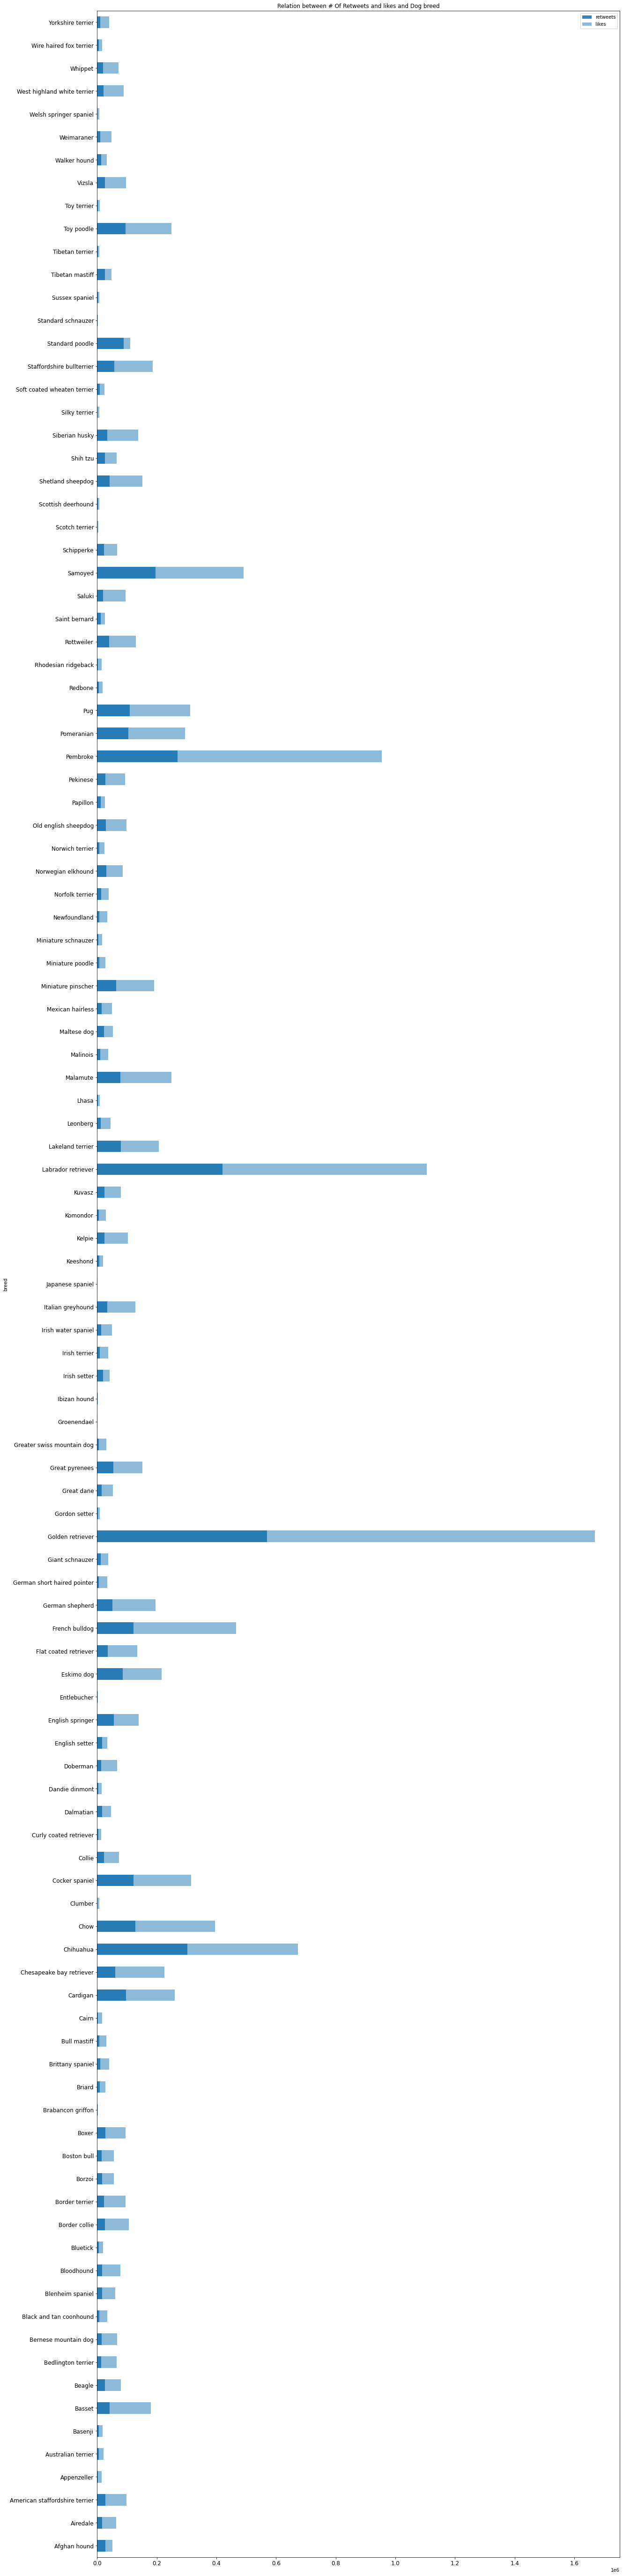

In [101]:
wrangled_df.groupby('breed')['retweets'].sum().plot(legend= True, title='Relation between # Of Retweets and likes and Dog breed',alpha=0.9,fontsize='large',kind='barh',ylabel='# of retweets and likes', figsize=(20,100));
wrangled_df.groupby('breed')['likes'].sum().plot(legend= True,alpha=0.5, kind='barh');


<h3 style='color: blue'>How We Rate Dogs got popualr over the years</h3>

- we can see that We Rate Dogs got popualr over the years

In [102]:
df = wrangled_df
df['year']= pd.DatetimeIndex(df['timestamp']).year
df[['timestamp','year']].sample(1)

,timestamp,year
1294,2016-01-13 02:43:46+00:00,2016


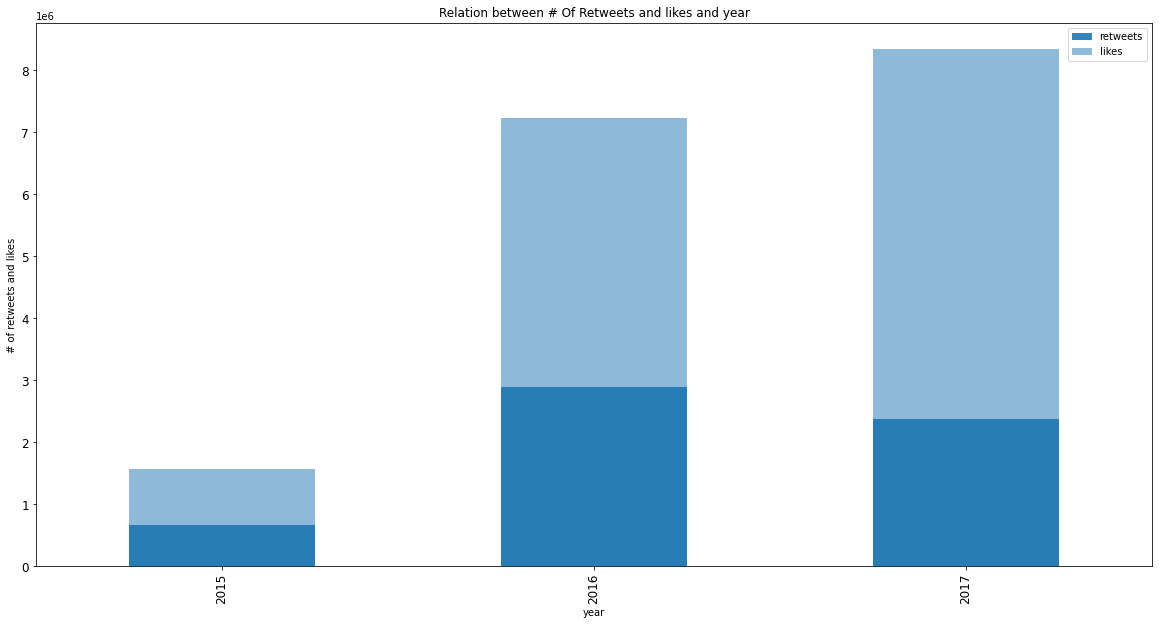

In [103]:
df.groupby('year')['retweets'].sum().plot(legend= True, title='Relation between # Of Retweets and likes and year',alpha=0.9,fontsize='large',kind='bar',ylabel='# of retweets and likes', figsize=(20,10));
df.groupby('year')['likes'].sum().plot(legend= True,alpha=0.5, kind='bar');

In [104]:
df_master.text = df_master.text.astype(str)
text = " ".join(tweet for tweet in df_master.text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 151263 words in the combination of all review.


# Now let's create a funny word cloud!

In [105]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

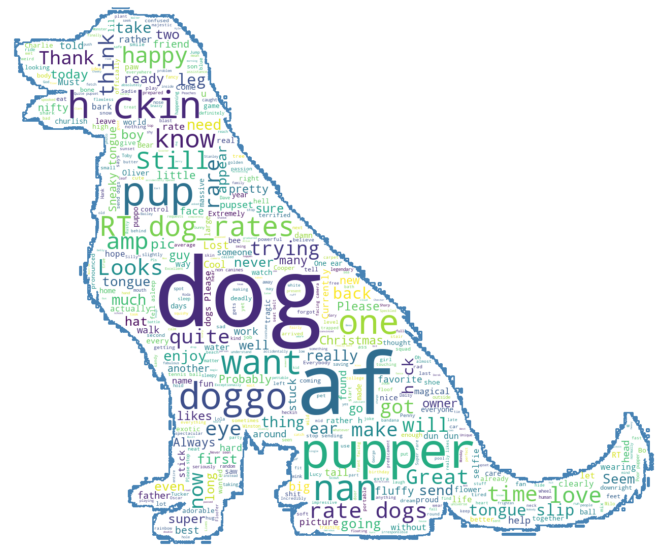

In [106]:
mask = np.array(Image.open('mask.jpeg'))
stopwords = set(STOPWORDS)
stopwords.update(['look', 'tho', 'see', 'good', 'hello', 'day', 'say', 'Meet'])
wordcloud = WordCloud( max_words=500, stopwords=stopwords, 
                      background_color='white', contour_width=3,
                      contour_color='steelblue', mask=mask).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Thanks!